# Umme Rubaiyat Chowdhury
DS3

Inference to be shown:

You have more than one feature here, and If the value of the model predicts 0.79, that would mean a person is 79% alive and 21% dead.

Intermediate steps involved:

    Countplot for survived vs sex
    Find out the number of missing values
    Boxplot for Pclass and age
    Heatmap to check for null values.
    
To access the dataset click the link 
 https://github.com/ummerubaiyat/GreyCampus-DS3/commit/cc9edf8e517354afafcd958d8172e23d898400f0

 

In [1]:
# importing Libraries numpy for numerical operations, pandas for data frames, matplotlib for data visualization 
#seaborn for colorful data visualization 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# reading csv file
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
##it shows all the dataset information such as rows name,column name, not null count, data types.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

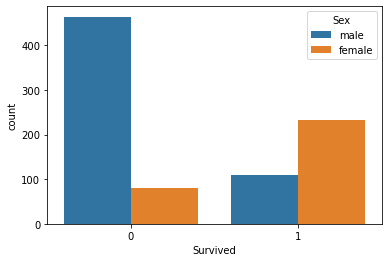

In [4]:
# plotting count plot of survived vs sex
sns.countplot(x='Survived',hue='Sex',data=titanic_data)


In [5]:
# checking the total null value
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

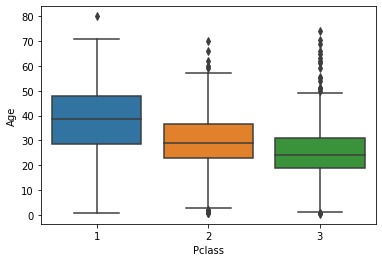

In [6]:
# plotting box plot Pclass vs Age
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

<AxesSubplot:>

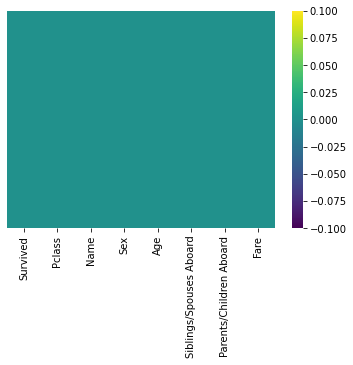

In [7]:
# heatmap is visualizing the concentration of values between X and Y values. 
#This helps in finding patterns and gives a perspective of depth.
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')
#Here, we have visualized titanic_data null value

In [8]:
# converting sex into binary
#female is denoted by 0 and male is denoted by 1. 
#so it will be useful for categorical
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)
sex
 

,male
0,1
1,0
2,0
3,0
4,1
...,...
882,1
883,0
884,0
885,1


In [9]:
# doing the same for 'Pclass'
pclass = pd.get_dummies(titanic_data['Pclass'], drop_first = True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
882,1,0
883,0,0
884,0,1
885,0,0


In [10]:
# we concatenate the columns to titanic_data
titanic_data = pd.concat([titanic_data, sex, pclass], axis = 1)

In [11]:
#removing unwanted cols
titanic_data.drop(['Pclass', 'Name', 'Sex'], axis = 1, inplace = True)

In [12]:
# viewing data set after the EDA
titanic_data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


<AxesSubplot:>

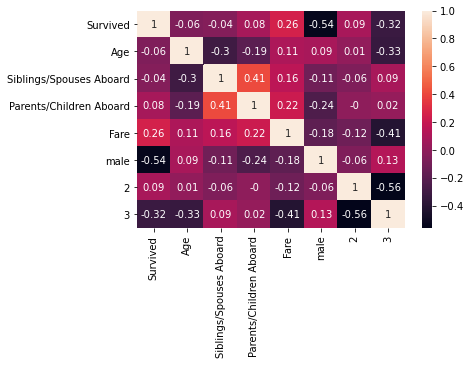

In [13]:
# checking the correlation to find out the required variables
corr = titanic_data.corr().round(2)
sns.heatmap(corr, annot = True)
# we can see that 'survived' and 'male' have good correlation

In [14]:
#Importing the requres ML Librarires
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [15]:
#Choossing the independent variable X and the dependent variable Y
X = titanic_data[['male']]
y = titanic_data['Survived']

In [16]:
#train_test_split function used to split datas into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=1)

In [17]:
# creating a variable for Logistic Regression
lg_model = LogisticRegression()

In [18]:
#Appling LogisticRegression model on the training set
#fit function is called where actual training happens
lg_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
#testing the model
prediction = lg_model.predict(X_test)

In [20]:
# importing classification_report libarary it prepares classification report for the output
from sklearn.metrics import classification_report

In [21]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82       162\n           1       0.72      0.70      0.71       105\n\n    accuracy                           0.78       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.78      0.77       267\n'

In [22]:
# importing confusion_matrix library to describe the performance of a classification model
from sklearn.metrics import confusion_matrix

In [23]:
#Applying confusion matrics 
confusion_matrix(y_test,prediction)

array([[133,  29],
       [ 31,  74]], dtype=int64)

In [24]:
# importing library for accuracy calculation
from sklearn.metrics import accuracy_score

In [25]:
#Applying accuracy score
accuracy_score(y_test,prediction)

0.7752808988764045

In [26]:
#rounding the score
score_percentage = round((accuracy_score(y_test,prediction))*100,2)
score_percentage

77.53